# Telco Firm - Customer Churn Prediction Model - Team Prague

# Intro
## General

Considering the costs incurred in acquiring new customers, it is often cheaper for firms to retain existing customer rather than acquire new ones. This project seeks to build a model that predicts customer churn and retention for a telco company by first seeking to understand what profile of customers are most at risk of leaving.

Classification in Machine Learning is the approach used to make a program learn from previous data and enable it to give new observations or make new classifications on new data. This project will therefore seek to build a model that predicts customer churn and retention for a telco company based on exisitng data of the characteristics of the company's customers.

## Data Understanding
The data for this project is in a csv format. The following describes the columns present in the data.

- **Gender** -- Whether the customer is a male or a female

- **SeniorCitizen** -- Whether a customer is a senior citizen or not

- **Partner** -- Whether the customer has a partner or not (Yes, No)

- **Dependents** -- Whether the customer has dependents or not (Yes, No)

- **Tenure** -- Number of months the customer has stayed with the company

- **Phone Service** -- Whether the customer has a phone service or not (Yes, No)

- **MultipleLines** -- Whether the customer has multiple lines or not

- **InternetService** -- Customer's internet service provider (DSL, Fiber Optic, No)

- **OnlineSecurity** -- Whether the customer has online security or not (Yes, No, No Internet)

- **OnlineBackup** -- Whether the customer has online backup or not (Yes, No, No Internet)

- **DeviceProtection** -- Whether the customer has device protection or not (Yes, No, No internet service)

- **TechSupport** -- Whether the customer has tech support or not (Yes, No, No internet)

- **StreamingT**V -- Whether the customer has streaming TV or not (Yes, No, No internet service)

- **StreamingMovies** -- Whether the customer has streaming movies or not (Yes, No, No Internet service)

- **Contract** -- The contract term of the customer (Month-to-Month, One year, Two year)

- **PaperlessBilling** -- Whether the customer has paperless billing or not (Yes, No)

- **Payment Method** -- The customer's payment method (Electronic check, mailed check, Bank transfer(automatic), Credit card(automatic))

- **MonthlyCharges** -- The amount charged to the customer monthly

- **TotalCharges** -- The total amount charged to the customer

- **Churn** -- Whether the customer churned or not (Yes or No)

<br>

## Research Questions and Hypothesis

### Hypothesis
**Null hypothesis:** - There is no significant relationship between the customer's characteristics and their likelihood to churn from the company's product or service.

**Alternative hypothesis:** There is a significant relationship between the customer's characteristics and their likelihood to churn from the company's product or service.

### Research Questions
The project will seek to answer the following research questions:

1. What are some issues present in the data and how can they best be handled?
2. What is the overall churn rate in the company?
3. How does the churn rate vary with different demographic factors such as gender, senior citizen status, and partner/dependent status?
4. Is there a correlation between the tenure, presence of an internet service, monthly charges, payment method and churn rate?
5. How can we best calculate the lifetime value of a customer?
6.	Which contract type has the highest churn rate?
7. What services can be used to quantify how a customer rates the service quality?
8. What are the most significant features (customer characteristics) determining customer churn?
9. Based on the data available, is it possible to build categories to classify customers on characteristics to know ehther they are likely to churn?
10. What strategies can be implemented to retain customers and reduce churn?
11. What classification algorithms can best determine the most prominent features related to churn?


# Setup

## Installation
Here is the section to install all the packages/libraries that will be needed to tackle the challlenge.

In [2]:
# !pip install -q <lib_001> <lib_002> ...

## Importation
Here is the section to import all the packages/libraries that will be used through this notebook.

In [3]:
# Data handling
import pandas as pd
import numpy as np

# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt

# EDA (pandas-profiling, etc. )
...

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
...

# Other packages
import os


# Data Loading
Here is the section to load the datasets (train, eval, test) and the additional files

In [7]:
# For CSV, use pandas.read_csv
from google.colab import drive
drive.mount('/content/drive')

# Read a CSV file called 'Telco-Customer-Churn.csv' and store the data in a Pandas DataFrame called churn_df
churn_df = pd.read_csv('/content/drive/MyDrive/03-Classification-LP3/Telco-Customer-Churn.csv')

# Set the 'customerID' column as the index of the churn_df DataFrame
churn_df.set_index('customerID', inplace= True)

# Return the churn_df DataFrame, with the customerID column as the index
churn_df

Mounted at /content/drive


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


# Exploratory Data Analysis: EDA
Here is the section to **inspect** the datasets in depth, **present** it, make **hypotheses** and **think** the *cleaning, processing and features creation*.

In [8]:
# Print information about the churn_df DataFrame
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [9]:
# Generate descriptive statistics of the churn_df DataFrame
churn_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [10]:
# Check for missing values in the churn_df DataFrame
churn_df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
# Calculate the correlation matrix for the churn_df DataFrame
churn_corr = churn_df.corr()

# Print the churn_corr DataFrame
churn_corr

,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


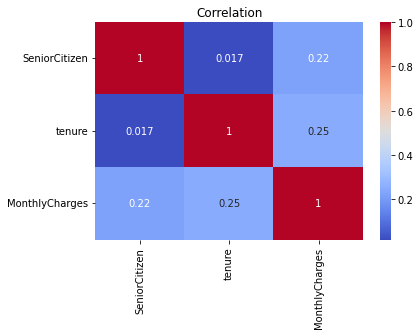

In [12]:
# create a heatmap using seaborn
heatmap = sns.heatmap(churn_corr, annot=True, cmap='coolwarm')

# set rotation for x-axis and y-axis tick labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)

# set plot title
plt.title('Correlation')

# show the plot
plt.show()

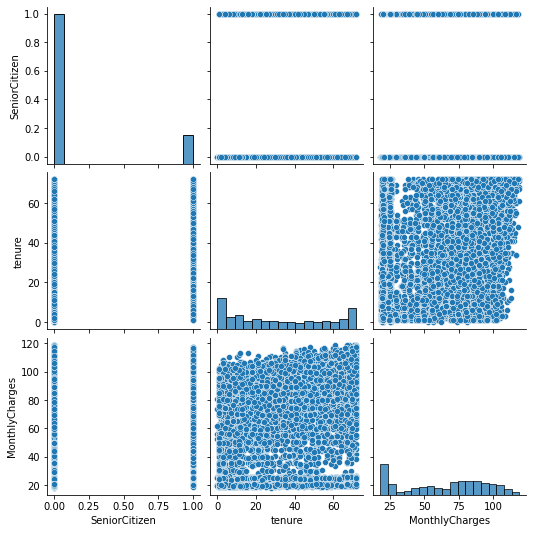

In [13]:
# Create a pair plot of the churn_df DataFrame
sns.pairplot(churn_df)

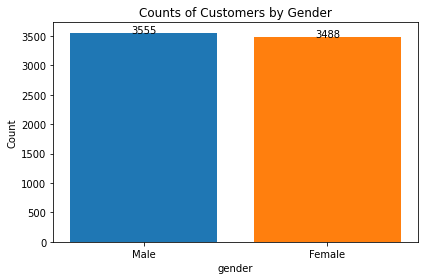

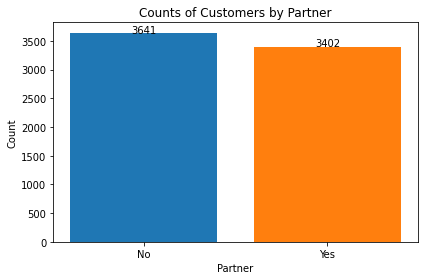

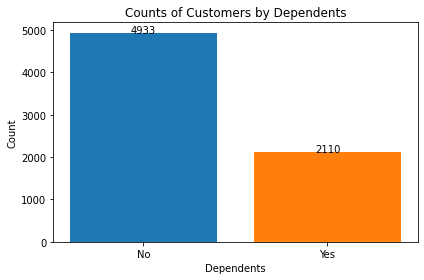

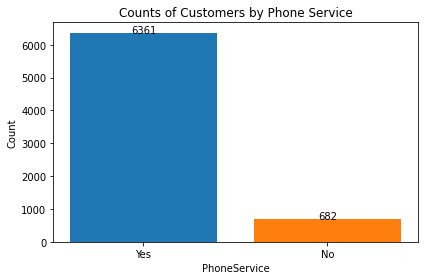

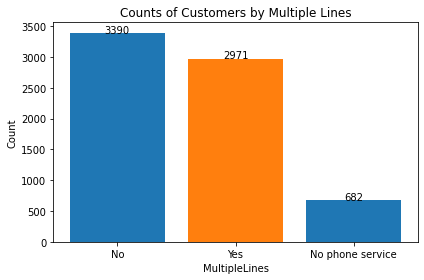

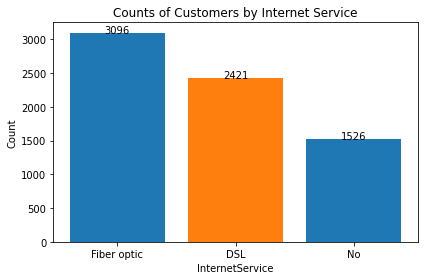

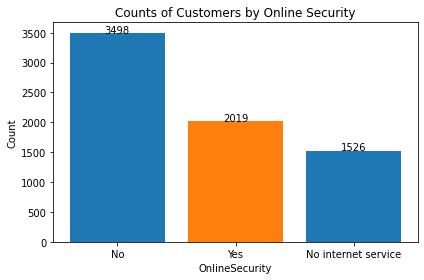

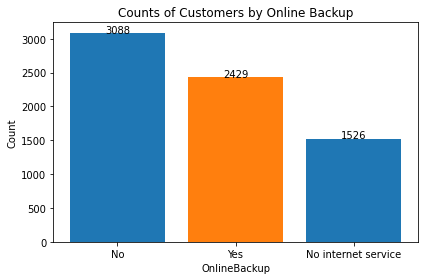

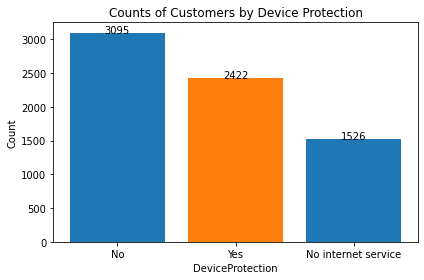

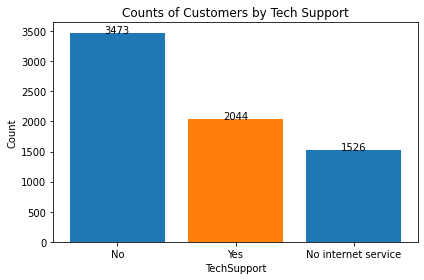

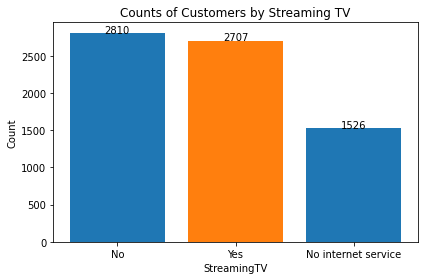

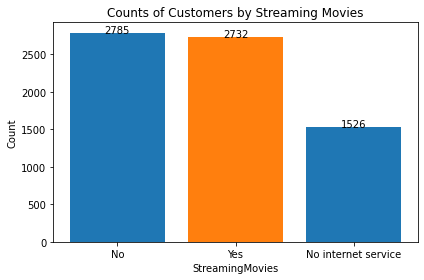

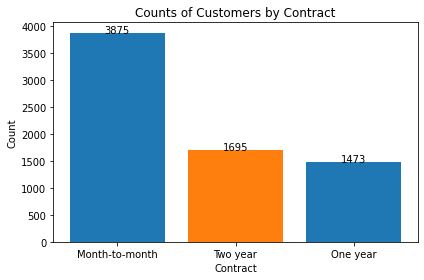

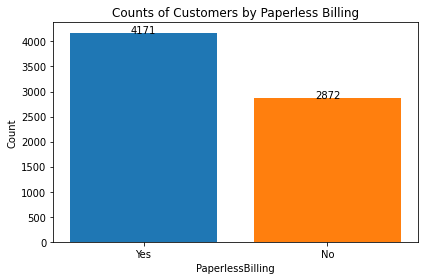

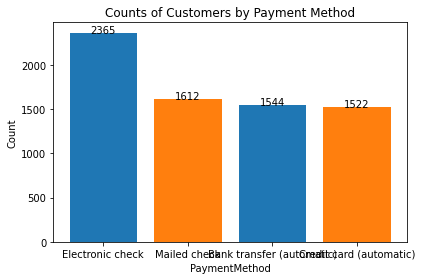

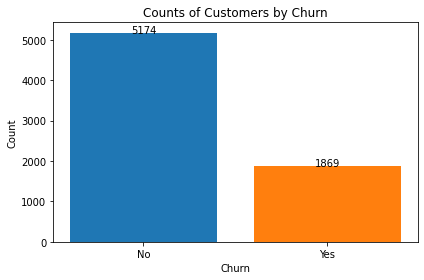

In [14]:
# Define a function called 'plot_counts' that takes a DataFrame, a column name, and an optional title as input
def plot_counts(data, column, title=None):
    # Create a figure and axis object
    fig, ax = plt.subplots()
    # Count the number of occurrences of each unique value in the specified column
    counts = data[column].value_counts()
    # Create a bar chart of the counts for each unique value, using blue and orange colors
    ax.bar(counts.index, counts.values, color=['#1f77b4', '#ff7f0e'])
    # Set the x-axis label to the specified column name
    ax.set_xlabel(column)
    # Set the y-axis label to 'Count'
    ax.set_ylabel('Count')
    # If a title is provided, set the title of the plot
    if title:
        ax.set_title(title)
    # Add labels to each bar in the chart showing the count of customers for each unique value
    for i, v in enumerate(counts.values):
        ax.text(i, v, str(v), ha='center')
    # Adjust the layout of the plot to optimize spacing
    plt.tight_layout()
    # Display the plot
    plt.show()

# Call the 'plot_counts' function on the churn_df DataFrame, specifying the columns
plot_counts(churn_df, "gender", "Counts of Customers by Gender")
plot_counts(churn_df, "Partner", "Counts of Customers by Partner")
plot_counts(churn_df, "Dependents", "Counts of Customers by Dependents")
plot_counts(churn_df, "PhoneService", "Counts of Customers by Phone Service")
plot_counts(churn_df, "MultipleLines", "Counts of Customers by Multiple Lines")
plot_counts(churn_df, "InternetService", "Counts of Customers by Internet Service")
plot_counts(churn_df, "OnlineSecurity", "Counts of Customers by Online Security")
plot_counts(churn_df, "OnlineBackup", "Counts of Customers by Online Backup")
plot_counts(churn_df, "DeviceProtection", "Counts of Customers by Device Protection")
plot_counts(churn_df, "TechSupport", "Counts of Customers by Tech Support")
plot_counts(churn_df, "StreamingTV", "Counts of Customers by Streaming TV")
plot_counts(churn_df, "StreamingMovies", "Counts of Customers by Streaming Movies")
plot_counts(churn_df, "Contract", "Counts of Customers by Contract")
plot_counts(churn_df, "PaperlessBilling", "Counts of Customers by Paperless Billing")
plot_counts(churn_df, "PaymentMethod", "Counts of Customers by Payment Method")
plot_counts(churn_df, "Churn", "Counts of Customers by Churn")

# Feature Processing & Engineering
Here is the section to **clean**, **process** the dataset and **create new features**.

## Drop Duplicates

In [ ]:
# Use pandas.DataFrame.drop_duplicates method

## Impute Missing Values

In [ ]:
# Use sklearn.impute.SimpleImputer

## New Features Creation

In [ ]:
# Code here

## Features Encoding




In [ ]:
# From sklearn.preprocessing use OneHotEncoder to encode the categorical features.

## Dataset Splitting

In [ ]:
# Use train_test_split with a random_state, and add stratify for Classification

## Features Scaling


In [ ]:
# From sklearn.preprocessing use StandardScaler, MinMaxScaler, etc.

## Optional: Train Dataset Balancing 

In [ ]:
# Use Over-sampling/Under-sampling methods, more details here: https://imbalanced-learn.org/stable/install.html

# Machine Learning Modeling 
Here is the section to **build**, **train**, **evaluate** and **compare** the models to each others.

## Simple Model #001

Please, keep the following structure to try all the model you want.

### Create the Model

In [ ]:
# Code here

### Train the Model

In [ ]:
# Use the .fit method

### Evaluate the Model on the Evaluation dataset (Evalset)

In [ ]:
# Compute the valid metrics for the use case # Optional: show the classification report 

### Predict on a unknown dataset (Testset)

In [ ]:
# Use .predict method # .predict_proba is available just for classification

## Simple Model #002

### Create the Model

In [ ]:
# Code here

### Train the Model

In [ ]:
# Use the .fit method

### Evaluate the Model on the Evaluation dataset (Evalset)

In [ ]:
# Compute the valid metrics for the use case # Optional: show the classification report 

### Predict on a unknown dataset (Testset)

In [ ]:
# Use .predict method # .predict_proba is available just for classification

## Models comparison
Create a pandas dataframe that will allow you to compare your models.

Find a sample frame below :

|     | Model_Name     | Metric (metric_name)    | Details  |
|:---:|:--------------:|:--------------:|:-----------------:|
| 0   |  -             |  -             | -                 |
| 1   |  -             |  -             | -                 |


You might use the pandas dataframe method `.sort_values()` to sort the dataframe regarding the metric.

## Hyperparameters tuning 

Fine-tune the Top-k models (3 < k < 5) using a ` GridSearchCV`  (that is in sklearn.model_selection
) to find the best hyperparameters and achieve the maximum performance of each of the Top-k models, then compare them again to select the best one.

In [ ]:
# Code here

# Export key components
Here is the section to **export** the important ML objects that will be use to develop an app: *Encoder, Scaler, ColumnTransformer, Model, Pipeline, etc*.

In [ ]:
# Use pickle : put all your key components in a python dictionary and save it as a file that will be loaded in an app